# Boosting en Machine Learning con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Matemáticas, Analisis de datos y Python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Machine Learning" title="Machine Learning" src="http://relopezbriega.github.io/images/machine-learning.jpg">

> "La opinión de toda una multitud es siempre más creíble que la de una minoría."

**[Miguel de Unamuno](https://es.wikipedia.org/wiki/Miguel_de_Unamuno)**

## Introducción

La meta de construir sistemas que puedan adaptarse a sus entornos y aprender de su experiencia ha atraído a investigadores de muchos campos, como la [Informática](https://es.wikipedia.org/wiki/Inform%C3%A1tica),
[Matemáticas](https://es.wikipedia.org/wiki/Matem%C3%A1ticas), [Física](https://es.wikipedia.org/wiki/F%C3%ADsica), [Neurociencia](https://es.wikipedia.org/wiki/Neurociencia) y la [Ciencia cognitiva](https://es.wikipedia.org/wiki/Ciencia_cognitiva). Intuitivamente, para que un *algoritmo de aprendizaje* sea efectivo y preciso en sus predicciones, debería reunir tres condiciones básicas: 

1. Debería ser entrenado con *suficientes* datos de entrenamiento.
2. Sus resultados deberían  *ajustarse* bastante bien a los ejemplos de entrenamiento (lo que significaría tener una tasa de error baja).
3. Debería ser lo suficientemente "simple". Esta última condición, que las reglas más simples suelen ser las mejores, se conoce a menudo con el nombre de "[La navaja de Occam](https://es.wikipedia.org/wiki/Navaja_de_Ockham)".

Muchos algoritmos se han creado y existen aún muchos por descubrir; pero unos de los que ha ganado mucha atracción en los últimos años por su simpleza y su gran éxito en competencias como [kraggle](https://www.kaggle.com/), son los algoritmos de [Boosting](https://es.wikipedia.org/wiki/Boosting).  

## ¿Qué es Boosting?

[Boosting](https://es.wikipedia.org/wiki/Boosting) es un **enfoque de [Machine Learning](http://relopezbriega.github.io/category/machine-learning.html) basado en la idea de crear una regla de predicción altamente precisa combinando muchas reglas relativamente débiles e imprecisas**. Una teoría notablemente rica ha evolucionado en torno al [Boosting](https://es.wikipedia.org/wiki/Boosting), con conexiones a una amplia gama de ramas de la ciencia, incluyendo [estadísticas](http://relopezbriega.github.io/category/pobabilidad-y-estadistica.html), [teoría de juegos](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_juegos), [optimización convexa](http://relopezbriega.github.io/blog/2017/01/18/problemas-de-optimizacion-con-python/) y [geometría de la información](https://es.wikipedia.org/wiki/Geometr%C3%ADa_de_la_informaci%C3%B3n). Los algoritmos de [Boosting](https://es.wikipedia.org/wiki/Boosting) han tenido éxito práctico con aplicaciones, por ejemplo, en [biología](https://es.wikipedia.org/wiki/Biolog%C3%ADa), [visión](https://es.wikipedia.org/wiki/Visi%C3%B3n_artificial) y [procesamiento del lenguaje natural](https://es.wikipedia.org/wiki/Procesamiento_de_lenguajes_naturales). En varios momentos de su historia, el [Boosting](https://es.wikipedia.org/wiki/Boosting) ha sido objeto de controversia por el misterio y la paradoja que parece presentar. El [Boosting](https://es.wikipedia.org/wiki/Boosting) asume la disponibilidad de un *algoritmo de aprendizaje base o débil* que, dado ejemplos de entrenamiento etiquetados, produce un *clasificador base o débil*. El objetivo de [Boosting](https://es.wikipedia.org/wiki/Boosting) es el de mejorar el rendimiento del *algoritmo de aprendizaje* al tratarlo como una "caja negra" que se puede llamar repetidamente, como una subrutina. Si bien el *algoritmo de aprendizaje base* puede ser rudimentario y moderadamente inexacto, no es del todo trivial ni poco informativo y debe obtener resultados mejores a los que se podrían obtener en forma aleatoria. La idea fundamental detrás de [Boosting](https://es.wikipedia.org/wiki/Boosting) es elegir *conjuntos de entrenamiento* para el *algoritmo de aprendizaje base* de tal manera que lo obligue a *inferir* algo nuevo sobre los datos cada vez que se lo llame. Uno de los primeros algoritmos de [Boosting](https://es.wikipedia.org/wiki/Boosting) en tener éxito en problemas de clasificación binaria fue [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost).

## AdaBoost

[AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) es la abreviatura de *adaptive boosting*, es un algoritmo que puede ser utilizado junto con otros *algoritmos de aprendizaje* para mejorar su rendimiento. 
[AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) funciona eligiendo un *algoritmo base* (por ejemplo [árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n)) y mejorándolo iterativamente al tomar en cuenta los casos incorrectamente clasificados en el conjunto de entrenamiento. 

En [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) asignamos *pesos* iguales a todos los ejemplos de entrenamiento y elegimos un *algoritmo base*. En cada paso de iteración, aplicamos el *algoritmo base* al conjunto de entrenamiento y aumentamos los pesos de los ejemplos incorrectamente clasificados. Iteramos n veces, cada vez aplicando el *algoritmo base* en el conjunto de entrenamiento con *pesos* actualizados. El modelo final es la suma ponderada de los resultados de los n *algoritmos base*.
[AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) en conjunto con [árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) se ha mostrado sumamente efectivo en varios problemas de [Machine Learning](http://relopezbriega.github.io/category/machine-learning.html). Veamos un ejemplo en [Python](https://www.python.org/).

In [2]:
# <!-- collapse=True -->
# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import graphviz
import xgboost as xgb

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [3]:
# Utilzando el dataset breast cancer
cancer = load_breast_cancer()

# dataset en formato tabular
pd.DataFrame(data=cancer.data,
            columns=cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Separando los datos en sets de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                        cancer.target, random_state=1)

# Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

Precisión modelo inicial train/test  0.962/0.888


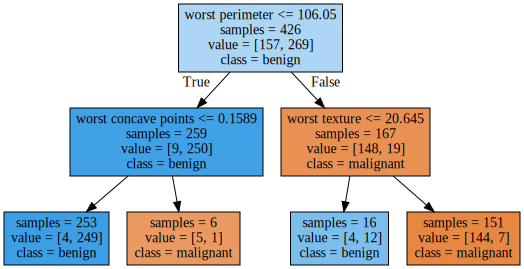

In [5]:
# Dibujando el modelo
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
# Utilizando AdaBoost para aumentar la precisión
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos
ada = ada.fit(X_train, y_train)

In [7]:
# Imprimir la precisión.
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('Precisión modelo con AdaBoost train/test  {0:.3f}/{1:.3f}'
      .format(ada_train, ada_test))

Precisión modelo con AdaBoost train/test  1.000/0.965


Para este ejemplo utilizamos el [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) [breast cancer](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) que ya viene en cargado en [scikit-learn](http://scikit-learn.org/); la idea es clasificar casos de cáncer de pecho según varios atributos de los tumores. 

En primer lugar, creamos un clasificador simple, un [árbol de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) de hasta dos niveles de profundidad. Este clasificador tuvo un rendimiento bastante bueno, logrando una precisión del 96% con los datos de entrenamiento y del 89% con los datos de evaluación.

Luego aplicamos [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) sobre el mismo modelo para mejorar la precisión. Vemos que el modelo con [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) logra una precisión del 100% en los datos de entrenamiento y del 96% en los datos de evaluación. Debemos tener en cuenta que una precisión del 100% sobre los datos de entrenamiento, puede ser un indicio de que el modelo tal vez este [sobreajustado](http://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste/). El [sobreajuste](http://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste/) es uno de los riesgo que suele traer aparejado la utilización de las técnicas de [Boosting](https://es.wikipedia.org/wiki/Boosting).

A partir del éxito inicial de [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost), las técnicas de [Boosting](https://es.wikipedia.org/wiki/Boosting) fueron evolucionando hacia un modelo estadístico más generalizado, tratando el problema como un caso de [optimización](http://relopezbriega.github.io/blog/2017/01/18/problemas-de-optimizacion-con-python/) numérica en dónde el objetivo es minimizar la [función de perdida](https://en.wikipedia.org/wiki/Loss_functions_for_classification) del modelo mediante la adición de los *algoritmos de aprendizaje débiles* utilizando un procedimiento de optimización del tipo de [gradiente descendiente](https://en.wikipedia.org/wiki/Gradient_descent). Esta generalización permitió utilizar funciones arbitrarias de pérdida diferenciables, ampliando la técnica más allá de los problemas de clasificación binaria hacia problemas de regresión y de clasificación multi-variable. Esta nueva familia de algoritmos de [Boosting](https://es.wikipedia.org/wiki/Boosting) se conocen bajo el nombre de [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting).

## Gradient Boosting

El [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) implica tres elementos:

* Una [función de perdida](https://en.wikipedia.org/wiki/Loss_functions_for_classification) a optimizar .
* Un *algoritmo de aprendizaje débil* para hacer las predicciones.
* Un modelo aditivo para añadir los *algoritmos de aprendizaje débiles*  que minimizan la [función de perdida](https://en.wikipedia.org/wiki/Loss_functions_for_classification).


### Función de pérdida
La [función de perdida](https://en.wikipedia.org/wiki/Loss_functions_for_classification) utilizada va a depender del tipo de problema al que nos enfrentamos. La principal característica que debe poseer, es que sea [diferenciable](https://es.wikipedia.org/wiki/C%C3%A1lculo_diferencial). Existen varias funciones de *pérdida* estándar. Por ejemplo, para problemas de [regresión](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_la_regresi%C3%B3n) podemos utilizar un [error cuadrático](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio) y para problemas de clasificación podemos utilizar una pérdida logarítmica o una [entropía cruzada](https://es.wikipedia.org/wiki/Entrop%C3%ADa_cruzada).

### Algoritmo de aprendizaje débil
El algoritmo de aprendizaje débil que se utiliza en el [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) es el de [árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n). Específicamente se usan árboles de regresión que producen valores reales para las divisiones y cuya salida se puede sumar, permitiendo que los resultados de los modelos subsiguientes sean agregados y corrijan los errores promediando las predicciones. 
Es común restringir a los [árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) de manera específica para asegurarnos que el algoritmo permanezca *débil*. Se suelen restringir el número máximo de capas, nodos, divisiones u hojas. 

### Modelo aditivo
Los [árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) son agregados de a uno a la vez, y los árboles existentes en el modelo no cambian. Para determinar los *parámetros* que tendrán cada uno de los [árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) que son agregados al modelo se utiliza un procedimiento de [gradiente descendiente](https://en.wikipedia.org/wiki/Gradient_descent) que minimizará la [función de perdida](https://en.wikipedia.org/wiki/Loss_functions_for_classification). De esta forma se van agregando árboles con distintos parámetros de forma tal que la combinación de ellos minimiza la *pérdida* del modelo y mejora la predicción.


[Árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) con [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) es uno de los modelos más poderosos y más utilizados para problemas de aprendizaje supervisado. Su principal inconveniente es que requieren un ajuste cuidadoso de los parámetros y puede requerir mucho tiempo de entrenamiento. Al igual que otros modelos basados en árboles, el algoritmo funciona y escala bien  con una mezcla de características binarias y continuas. Asimismo, también arrastra el problema de los [árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) en los casos en que los datos están dispersos y tienen una alta dimensionalidad. Veamos un ejemplo con [scikit-learn](http://scikit-learn.org/) utilizando los mismos datos de [breast cancer](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) del ejemplo anterior.

In [8]:
# Armando el modelo con parametro max_depth
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=500,
                                  max_depth=1, learning_rate=0.01)
# Ajustando el modelo
gbrt.fit(X_train, y_train)
print('Precisión Gradient Boosting train/test  {0:.3f}/{1:.3f}'
      .format(gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)))

Precisión Gradient Boosting train/test  0.991/0.937


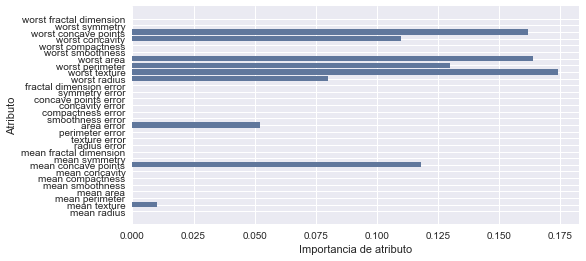

In [9]:
# Graficando la importancia de cada atributo
n_atributos = cancer.data.shape[1]
plt.barh(range(n_atributos), gbrt.feature_importances_, align='center')
plt.yticks(np.arange(n_atributos), cancer.feature_names)
plt.xlabel("Importancia de atributo")
plt.ylabel("Atributo")
plt.show();

Los principales parámetros de los modelos de [árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) con [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) son el número de árboles, `n_estimators`, y la tasa de aprendizaje, `learning_rate`,  que controla el grado en que a cada árbol se le permite corregir los errores de los árboles anteriores. Estos dos parámetros están altamente interconectados en el sentido de que si bajamos el valor en la tasa de aprendizaje vamos a necesitar un número mayor de árboles para construir un modelo de complejidad similar. Como podemos ver en el ejemplo, aplicando [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) con árboles de tan solo un nivel de profundidad, logramos una precisión del 99 % sobre los datos de entrenamiento y del 93 % sobre los datos de evaluación.

Si deseamos aplicar el algoritmo de [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) a un problema de gran escala, entonces la librería que sobresale por su facilidad de utilización y rendimiento es [XGBoost](http://xgboost.readthedocs.io/en/latest/).

## XGBoost

[XGBoost](http://xgboost.readthedocs.io/en/latest/) significa eXtreme Gradient Boosting. Es el algoritmo que ha estado dominando recientemente los problemas [Machine learning](http://relopezbriega.github.io/blog/2015/10/10/machine-learning-con-python/) y las competiciones de [Kaggle](https://www.kaggle.com/) con datos estructurados o tabulares. [XGBoost](http://xgboost.readthedocs.io/en/latest/) es una implementación de [árboles de decisión](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) con [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) diseñada para minimizar la velocidad de ejecución y maximizar el rendimiento. Posee una interface para varios lenguajes de programación, entre los que se incluyen [Python](https://www.python.org/), [R](https://www.r-project.org/), [Julia](https://julialang.org/) y [Scala](https://www.scala-lang.org/).

Internamente, [XGBoost](http://xgboost.readthedocs.io/en/latest/) representa todos los problemas como un caso de modelado predictivo de regresión que sólo toma valores numéricos como entrada. Si nuestros datos están en un formato diferente, primero vamos a tener que transformarlos para poder hacer uso de todo el poder de esta librería. El hecho de trabajar sólo con datos numéricos es lo que hace que esta librería sea tan eficiente. 

Veamos como la podemos utilizar en [Python](https://www.python.org/) con un ejemplo. Para este caso vamos a trabajar con el [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) [UCI breast-cancer](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer), el cual contiene todos [datos categóricos](http://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/) que vamos a tener que transformar. Este conjunto de datos describe los detalles técnicos de las biopsias de cáncer de mama y la tarea de predicción es predecir si el paciente tiene o no una recurrencia del cáncer, o no.

In [10]:
# Ejemplo de XGBoost

# cargando los datos
cancer2 = pd.read_csv('https://relopezbriega.github.io/downloads/datasets-uci-breast-cancer.csv')
cancer2.head()

,Unnamed: 0,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [11]:
# Divido los datos en data y target.
cancer_data = cancer2.values
cancer2.data = cancer_data[:,0:9]
cancer2.data = cancer2.data.astype(str)
cancer2.target = cancer_data[:,9]
cancer2.data.shape

(286, 9)

In [12]:
# Aplico el enconding para transformar los datos de entrada a valores
# numericos utilizando OneHotEncoder
encoded_data = None
for i in range(0, cancer2.data.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(cancer2.data[:,i])
    feature = feature.reshape(cancer2.data.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if encoded_data is None:
        encoded_data = feature
    else:
        encoded_data = np.concatenate((encoded_data, feature), axis=1)
        
# Aplico LaberEncoder a los valores de la variable target.
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(cancer2.target)
encoded_y = label_encoder.transform(cancer2.target)

# Separando los datos en sets de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(encoded_data, 
                        encoded_y, random_state=1)

In [13]:
# Construyo el modelo y ajusto los datos.
modelo = xgb.XGBClassifier()
modelo.fit(X_train, y_train)

# Realizo las predicciones
y_pred = modelo.predict(X_train)
predicciones = [round(value) for value in y_pred]
# Evalúo las predicciones
precision_train = accuracy_score(y_train, predicciones)

# Repito el proceso con datos de evaluacion
y_pred = modelo.predict(X_test)
predicciones = [round(value) for value in y_pred]

# Evalúo las predicciones
precision_test = accuracy_score(y_test, predicciones)
print(modelo)
print('Precisión xgboost train/test  {0:.3f}/{1:.3f}'
      .format(precision_train, precision_test))

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Precisión xgboost train/test  0.879/0.694


En este ejemplo logramos una precisión de 88 % con los datos de entrenamiento y del 69 % con los datos de evaluación. 

Con esto termina este artículo. Espero les haya sido de utilidad y puedan explorar todo el poder predictivo de [XGBoost](http://xgboost.readthedocs.io/en/latest/). Asimismo, otra implementación de [Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) que deberíamos tener en cuenta ya que también ha obtenido muy buenos resultados en términos de precisión y rendimiento es [LightGBM](https://github.com/Microsoft/LightGBM), que forma parte del [Distributed Machine Learning Toolkit](http://www.dmtk.io/) de Microsoft. 

Saludos!

*Este post fue escrito por [Raúl e. López Briega](http://relopezbriega.github.io/) utilizando [Jupyter notebook](http://jupyter.org/). Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/boosting.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/boosting.ipynb).*